# 5.4 Exercises

## Question 6

We continue to consider the use of a logistic regression model to predict the probability of `default` using `income` and `balance` on the `Default` data set. In particular, we will now compute estimates for the standard errors of the `income` and `balance` logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the `glm()` function. Do not forget to set a random seed before beginning your analysis.

In [1]:
library(ISLR)
library(boot)
summary(Default)

 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

### Step (a)

> Using the `summary()` and `glm()` functions, determine the estimated standard errors for the coefficients associated with `income` and `balance` in a multiple logistic regression model that uses both predictors.

In [2]:
set.seed(1)
glm.fit <- glm(default~balance+income, data = Default, family = binomial)
summary(glm.fit)


Call:
glm(formula = default ~ balance + income, family = binomial, 
    data = Default)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.4725  -0.1444  -0.0574  -0.0211   3.7245  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.154e+01  4.348e-01 -26.545  < 2e-16 ***
balance      5.647e-03  2.274e-04  24.836  < 2e-16 ***
income       2.081e-05  4.985e-06   4.174 2.99e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2920.6  on 9999  degrees of freedom
Residual deviance: 1579.0  on 9997  degrees of freedom
AIC: 1585

Number of Fisher Scoring iterations: 8


### Step (b)

> Write a function, `boot.fn()`, that takes as input the `Default` data set as well as an index of the observations, and that outputs the coefficient estimates for `income` and `balance` in the multiple logistic regression model.

In [3]:
boot.fn <- function(data, index) {
    return(coef(glm(default~balance+income, data=data, subset=index, family=binomial)))
}

### Step (c)

> Use the `boot()` function together with your `boot.fn()` function to estimate the standard errors of the logistic regression coefficients for income and balance 

In [4]:
result <- boot(Default, boot.fn, 50)
result


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Default, statistic = boot.fn, R = 50)


Bootstrap Statistics :
         original        bias     std. error
t1* -1.154047e+01  1.181200e-01 4.202402e-01
t2*  5.647103e-03 -6.974834e-05 2.282819e-04
t3*  2.080898e-05 -5.466926e-08 4.542214e-06

### Step (d)

> Comment on the estimated standard errors obtained using the `glm()` function and using your bootstrap function.

We can observe that bootstraped standard errors are slightly lower than our original models standard errors for estimates. This has to do with the fact that the logistic regression model makes certain assumptions regarding the underlying population (it's mean & variance) while bootstrapping allows us to use our sample and sample from that treating our data as population. The model for logistic regression alone includes variance of the unexplained error.

**QUESTION**: WHY bootstrapping is better than the model itself.

### Additional

We can also find out standard deviation and covariance

In [5]:
print(round(apply(result$t,2,sd),8))
paste("-----")
print(round(sqrt(diag(summary(glm.fit)$cov.unscaled)),8))

[1] 0.42024020 0.00022828 0.00000454


[1] "-----"

(Intercept)     balance      income 
 0.43475636  0.00022737  0.00000499 


## Question 7

In Sections 5.3.2 and 5.3.3, we saw that the `cv.glm()` function can be used in order to compute the LOOCV test error estimate. Alternatively, one could compute those quantities using just the `glm()` and `predict.glm()` functions, and a for loop. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the `Weekly` data set. Recall that in the context of classification problems, the LOOCV error is given in (5.4).

### Step (a)

> Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2`

In [6]:
glm.fit <- glm(Direction~Lag1+Lag2, data=Weekly, family=binomial)
summary(glm.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = Weekly)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -1.261   1.001   1.083   1.506  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22122    0.06147   3.599 0.000319 ***
Lag1        -0.03872    0.02622  -1.477 0.139672    
Lag2         0.06025    0.02655   2.270 0.023232 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1488.2  on 1086  degrees of freedom
AIC: 1494.2

Number of Fisher Scoring iterations: 4


### Step (b)

> Fit a logistic regression model that predicts `Direction` using `Lag1` and `Lag2` using all but the first observation.

In [7]:
subdata = Weekly[-1,]
glm.fit1 = glm(Direction~Lag1+Lag2, data=subdata, family=binomial)
summary(glm.fit1)


Call:
glm(formula = Direction ~ Lag1 + Lag2, family = binomial, data = subdata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6258  -1.2617   0.9999   1.0819   1.5071  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  0.22324    0.06150   3.630 0.000283 ***
Lag1        -0.03843    0.02622  -1.466 0.142683    
Lag2         0.06085    0.02656   2.291 0.021971 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1494.6  on 1087  degrees of freedom
Residual deviance: 1486.5  on 1085  degrees of freedom
AIC: 1492.5

Number of Fisher Scoring iterations: 4


### Step (c)

> Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if `P(Direction="Up"|Lag1,Lag2)` > 0.5. Was this observation correctly classified?

In [8]:
predn = predict(glm.fit, Weekly[1, ], type="response")
predv = ifelse(predn > 0.5, "Up", "Down")
paste("Prediction is", predv)
paste("True value is", Weekly[1, ncol(Weekly)])

[1] "Prediction is Up"

[1] "True value is Down"

No the model did not classify correctly.

### Step (d)

> Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:
    * Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
    * Compute the posterior probability of the market moving up for the ith observation.
    * Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
    * Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1,  and otherwise indicate it as a 0.

In [9]:
set.seed(1)
n = nrow(Weekly)
errors = rep(0, n)
for(i in 1:n) {
    glm.fit = glm(Direction~Lag1+Lag2, data=Weekly[-i,], family=binomial)
    pprob = predict(glm.fit, Weekly[i,], type="response")
    pred = ifelse(pprob > 0.5, "Up", "Down")
    error = ifelse(Weekly[i,]$Direction != pred, 1, 0)  
    errors[i] = error
}

### Step (e)

> Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

In [10]:
mean(errors)

[1] 0.4499541

The LOOCV estimate for the test error is 44.99%

## Question 8

We will now perform cross-validation on a simulated data set.

### Step (a)

> Generate a simulated data set as follows. In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

In [11]:
set.seed(1)
y = rnorm(100)
x = rnorm(100)
y = x - 2*x^2 + rnorm(100)

In this dataset, n=100 since we have 100 observations. Our p = 2 since we have two parameters. The model that generated this data is

$f(x)=\beta_0+\beta_1*x+\beta_2*x^2+\epsilon$

### Step (b)

> Create a scatterplot of X against Y . Comment on what you find.

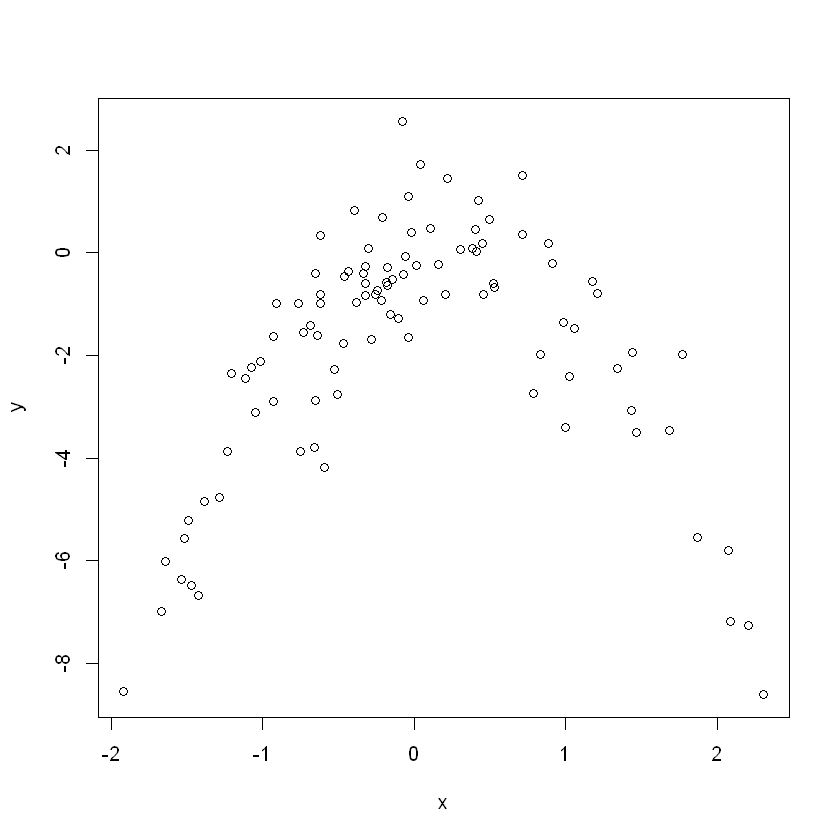

In [12]:
plot(x, y)

### Step (c)

> Set a random seed, and then compute the LOOCV errors that mresult from fitting the following four models using least squares:
* i. $Y=\beta_0+\beta_1*X+\epsilon$
* ii. $Y=\beta_0+\beta_1*X+\beta_2*X^2+\epsilon$
* iii.$Y=\beta_0+\beta_1*X+\beta_2*X^2+\beta_3*X^3+\epsilon$
* iv. $Y=\beta_0+\beta_1*X+\beta_2*X^2+\beta_3*X^3+\beta_4*X^4+\epsilon$

Note you may find it helpful to use the `data.frame()` function to create a single data set containing both `X` and `Y`.

In [13]:
df = data.frame(y, x)

In [14]:
set.seed(1)
loocv1 = rep(0, 4)
for (i in 1:4) {
    glm.fit = glm(y~poly(x, i), data=df)
    error = cv.glm(df, glm.fit, K=100)
    print(paste("Test Error for model", i, "is", round(error$delta[1], 4)))
    loocv1[i] = error$delta[1]
}

[1] "Test Error for model 1 is 5.891"
[1] "Test Error for model 2 is 1.0866"
[1] "Test Error for model 3 is 1.1026"
[1] "Test Error for model 4 is 1.1148"


We can also plot the errors

In [15]:
set.seed(8975)
loocv2 = rep(0, 4)
for (i in 1:4) {
    glm.fit = glm(y~poly(x, i), data=df)
    error = cv.glm(df, glm.fit, K=100)
    print(paste("Test Error for model", i, "is", round(error$delta[1], 4)))
    loocv2[i] = error$delta[1]
}

[1] "Test Error for model 1 is 5.891"
[1] "Test Error for model 2 is 1.0866"
[1] "Test Error for model 3 is 1.1026"
[1] "Test Error for model 4 is 1.1148"


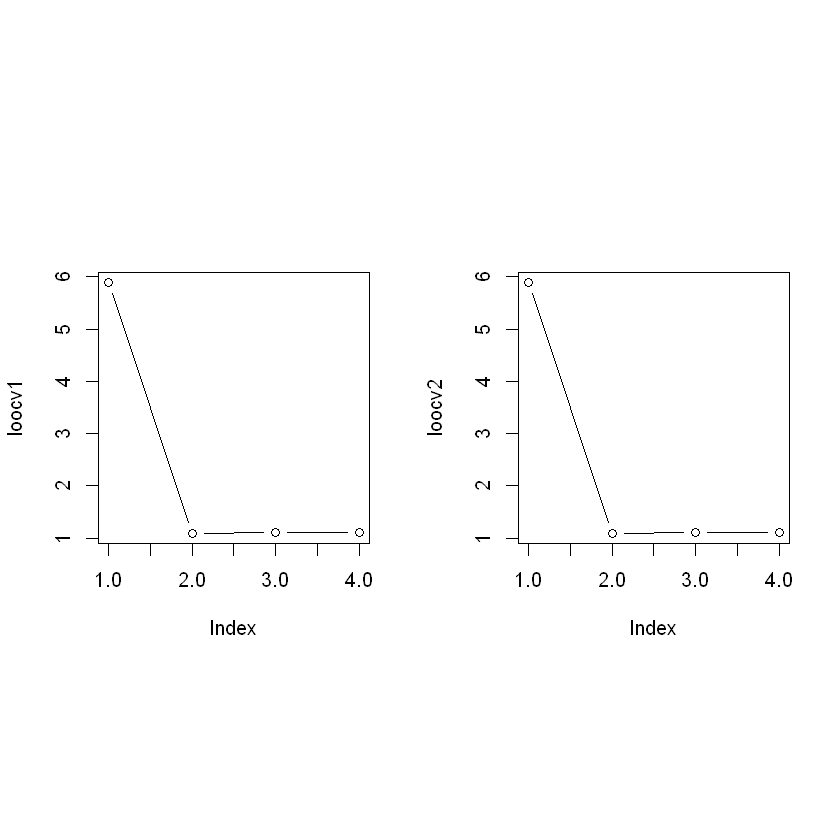

In [31]:
X11(8,8)
par(mfrow=c(1,2), pty = "s")
plot(loocv1, type = 'b')
plot(loocv2, type = 'b')

Results are the same since the LOOCV evaluates each individual value within the sample and calculates the test error. Results do not depend on the random seed because all observations are used as holdout


### Step (e)

> Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

The second model has the lowest test error which is not surprising since our original function that generated data has the same structure and parameters.

### Step (f)

> Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [17]:
for (i in 1:4) {
    glm.fit = glm(y~poly(x, i), data=df)
    print(summary(glm.fit))
}


Call:
glm(formula = y ~ poly(x, i), data = df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-7.3469  -0.9275   0.8028   1.5608   4.3974  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.2362  -7.737 9.18e-12 ***
poly(x, i)    2.3164     2.3622   0.981    0.329    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 5.580018)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 546.84  on 98  degrees of freedom
AIC: 459.69

Number of Fisher Scoring iterations: 2


Call:
glm(formula = y ~ poly(x, i), data = df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.89884  -0.53765   0.04135   0.61490   2.73607  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1032 -17.704   <2e-16 ***
poly(x, i)1   2.3164     1.0324   2.244   0.0271 *  
poly(x, i)2 -21.0586     1

We can observe that in all of the models the coefficient associate with x and x^2 parameter is statistically significant while others are not. These results somewhat agree with the results drawn from the cross-validation results since they all point towards the second model being the true data generating function.

## Question 9

We will now consider the Boston housing data set, from the MASS library.

### Step (a)

> Based on this data set, provide an estimate for the population mean of medv . Call this estimate $\hat{\mu}$.

In [18]:
library(MASS)
attach(Boston)

In [19]:
mean_medv = mean(Boston$medv)
mean_medv

[1] 22.53281

### Step (b)

> Provide an estimate of the standard error of $\hat{\mu}$. Interpret this result. Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [20]:
stderr_med = sd(Boston$medv) / sqrt(nrow(Boston))
stderr_med

[1] 0.4088611

### Step (c)

> Now estimate the standard error of $\hat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

In [21]:
library(boot)
set.seed(100)
meanfunc = function(x, i) {mean(x[i])}
bootmean = boot(Boston$medv, meanfunc, 10000)
bootmean


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = meanfunc, R = 10000)


Bootstrap Statistics :
    original       bias    std. error
t1* 22.53281 -0.003574229   0.4120724

We can observe that the result is very similar to the standard error calculated in section (b).

### Step (d)

>  Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of `medv`. Compare it to the results obtained using `t.test(Boston$medv)`. **Hint**: You can approximate a 95% confidence interval using the formula $[\hat{\mu}-2SE(\hat{\mu}), \hat{\mu}+2SE(\hat{\mu})]$

In [22]:
paste("95% CI is [", round(mean_medv - 2 * 0.412, 3),",", round(mean_medv + 2 * 0.412, 3), "]")

[1] "95% CI is [ 21.709 , 23.357 ]"

### Step (e)

> Based on this data set, provide an estimate, $\hat{\mu}_{medv}$, for the median value of medv in the population.

In [23]:
medvmed = median(Boston$medv)
medvmed

[1] 21.2

### Step (f)

> We now would like to estimate the standard error of $\hat{\mu}_{medv}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

In [24]:
funcmed = function(x, i) {median(x[i])}
bootmed = boot(Boston$medv, funcmed, 10000)
bootmed


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = funcmed, R = 10000)


Bootstrap Statistics :
    original    bias    std. error
t1*     21.2 -0.009705   0.3785636

We can observe that the standard error of the median using bootstrap is 0.378. Which indicates the following 95% CI.

In [25]:
paste("95% CI for median of medv is [", round(medvmed - 2 * 0.378, 3),",", round(medvmed + 2 * 0.378, 3), "]")

[1] "95% CI for median of medv is [ 20.444 , 21.956 ]"

### Step (g)

> Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity $\hat{\mu}_{0.1}$. (You can use the `quantile()` function.)

In [26]:
quant = quantile(Boston$medv, seq(0,1,by=0.1))[2]
quant

10% 
12.75

### Step (h)

> Use the bootstrap to estimate the standard error of $\hat{\mu}_{0.1}$. Comment on your findings.

In [27]:
quantfunc = function(x, i) {quantile(x[i], seq(0,1,by=0.1))[2]}
quantboot = boot(Boston$medv, quantfunc, 10000)
quantboot


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Boston$medv, statistic = quantfunc, R = 10000)


Bootstrap Statistics :
    original   bias    std. error
t1*    12.75 0.003965   0.5052243

10th percentile has a standard error of 0.5 and a value of 12.75, which means the confidence interval for it is the following.

In [28]:
paste("95% CI for 10th percentile of medv is [", round(quant - 2 * 0.5, 2),",", round(quant + 2 * 0.5, 2), "]")

[1] "95% CI for 10th percentile of medv is [ 11.75 , 13.75 ]"